# ANLY-590 Assignment 1        --Zheyi Wang (NetID:zw186)

## 1. Regularization. 

Import packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge, RidgeCV
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Read the data

In [2]:
df = pd.read_csv("Hitters.csv")
#print(df.head())
print(df.shape)

(322, 21)


Clean the data

In [3]:
# Print the rows that would be dropped
missValueRows = df[df.isnull().values == True].drop_duplicates()
#print(missValueRows)

# Drop rows with missing observations.
df = df.dropna()
# Drop the columns with dtype of object
df = df.select_dtypes(exclude=['object'])
print(df.shape)

(263, 17)


In [4]:
X = df.drop(labels=['Salary'], axis=1)
Y = df['Salary']
print(X.shape)

(263, 16)


### 1.1 Lasso Regression

**Visualization of the coefficient trajectories**

Sklearn provide an easy way to use Lasso regression model and we can easily get the coefficients by the attribute coef_.
To get the coefficient trajectories, we can test different values of alpha to find the relationship between alphas and coefs in the trained model.

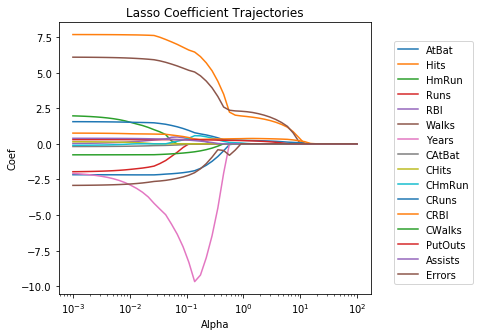

In [5]:
plt.figure(figsize = (7, 5))
ax = plt.subplot(111)

alphas = np.logspace(-3, 2)
traj = []
for a in alphas:
    traj.append(Lasso(alpha=a, normalize=True).fit(X, Y).coef_)
traj = np.array(traj)
traj = np.transpose(traj)
for i,predictor in enumerate(X.columns):
    ax.semilogx(alphas, traj[i], label=predictor)

# Visualization
ax.set_position([ax.get_position().x0, ax.get_position().y0, ax.get_position().width*0.8, ax.get_position().height])
ax.legend(loc='upper center', bbox_to_anchor=(1.2, 0.95), ncol=1)
plt.title('Lasso Coefficient Trajectories')
plt.xlabel('Alpha')
plt.ylabel('Coef')
plt.show()
plt.close()

As we can see from the plot, Lasso can set some coefs to 0, thus performing feature selection. 
With alpha growing, more coefs would be set to 0.

To find the final three predictors that remain in the model, alpha should be around 10 according to the plot.
We tried alpha=10 and luckily found there are just 3 predictors of which coefs are not zero.

**Thus the three predictors that remain in the model are: "Hits", "CRuns", and "CRBI"**

In [6]:
print(pd.Series(Lasso(alpha=10, normalize=True).fit(X, Y).coef_, index=X.columns))

AtBat      0.000000
Hits       0.329475
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      0.000000
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.076322
CRBI       0.204475
CWalks     0.000000
PutOuts    0.000000
Assists    0.000000
Errors     0.000000
dtype: float64


LassoCV() provide an easy way to use cross-validation to find the optimal value of the regularization penality (aka. Alpha).

**The optimal value of the regularization penality is 0.2392548032733829.**

**12 predictors are left in this model.**

AtBat     -1.428786
Hits       5.528711
HmRun     -0.000000
Runs       0.000000
RBI        0.106115
Walks      4.271708
Years     -7.564048
CAtBat    -0.000000
CHits      0.000000
CHmRun     0.468216
CRuns      0.595846
CRBI       0.325180
CWalks    -0.378771
PutOuts    0.272835
Assists    0.128507
Errors    -1.263183
dtype: float64


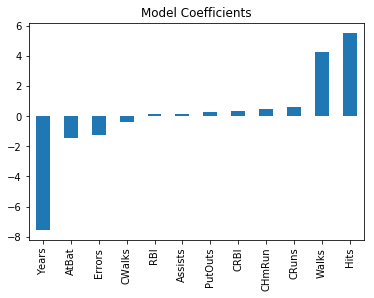

The optimal value of alpha:  0.2392548032733829


In [7]:
reg = LassoCV(normalize=True).fit(X, Y)
# coef of the best model
coef = pd.Series(reg.coef_, index=X.columns)
print(coef)
# plot the predictors
predictors = coef[coef!=0].sort_values()
predictors.plot(kind='bar', title='Model Coefficients')
plt.show()
plt.close()
# alpha for the best model
print('The optimal value of alpha: ',reg.alpha_)

### 1.2 Ridge Regression

**Visualization of the coefficient trajectories**

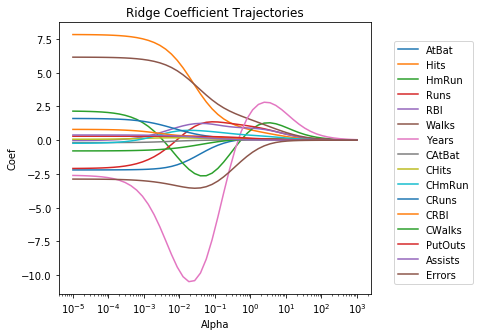

In [8]:
plt.figure(figsize = (7, 5))
ax = plt.subplot(111)

alphas = np.logspace(-5, 3)
traj = []
for a in alphas:
    traj.append(Ridge(alpha=a, normalize=True).fit(X, Y).coef_)
traj = np.array(traj)
traj = np.transpose(traj)
for i,predictor in enumerate(X.columns):
    ax.semilogx(alphas, traj[i], label=predictor)

ax.set_position([ax.get_position().x0, ax.get_position().y0, ax.get_position().width*0.8, ax.get_position().height])
ax.legend(loc='upper center', bbox_to_anchor=(1.2, 0.95), ncol=1)
plt.title('Ridge Coefficient Trajectories')
plt.xlabel('Alpha')
plt.ylabel('Coef')
plt.show()
plt.close()

Similarly, RidgeCV() also provide an easy way to use cross-validation to find the optimal value of the regularization penality (aka. Alpha).

**The optimal value of the regularization penality is 0.1**

AtBat     -0.463652
Hits       2.106433
HmRun     -2.284238
Runs       1.359761
RBI        1.155556
Walks      2.819749
Years     -6.565497
CAtBat     0.003567
CHits      0.107357
CHmRun     0.614058
CRuns      0.240508
CRBI       0.216115
CWalks    -0.143558
PutOuts    0.259934
Assists    0.133756
Errors    -3.160634
dtype: float64


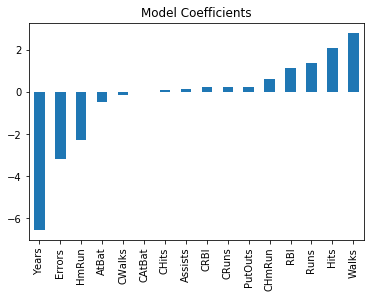

The optimal value of alpha:  0.1


In [9]:
reg = RidgeCV(normalize=True).fit(X, Y)
# coef of the best model
coef = pd.Series(reg.coef_, index=X.columns)
print(coef)
# plot the predictors
predictors = coef[coef!=0].sort_values()
predictors.plot(kind='bar', title='Model Coefficients')
plt.show()
plt.close()
# alpha for the best model
print('The optimal value of alpha: ',reg.alpha_)

Unlike Lasso, Ridge Regression cannot set the coefs to 0. We can see from above plot that all 16 features are predictors remain in the model.

## 2. Short Answer